In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

2025-10-30 19:11:05.019371: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Cargar el dataset

df = pd.read_csv('Credit_Card_Dataset.csv')
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras filas:")
df.head()

Dimensiones del dataset: (10000, 24)

Primeras filas:


,Customer_ID,Age,Gender,Marital_Status,Education_Level,Employment_Status,Annual_Income,Credit_Score,Number_of_Credit_Lines,Credit_Utilization_Ratio,...,Total_Spend_Last_Year,Defaulted,CLV,Total_Transactions,Avg_Transaction_Amount,Max_Transaction_Amount,Min_Transaction_Amount,Fraud_Transactions,Unique_Merchant_Categories,Unique_Transaction_Cities
0,CUST_00001,59,Male,Married,PhD,Unemployed,41442,642,4,0.44,...,13997,0,57310,22,454.337273,1379.89,11.83,0,10,13
1,CUST_00002,49,Male,Divorced,High School,Unemployed,85992,665,7,0.52,...,27768,0,124494,22,378.365000,1939.47,7.00,1,8,13
2,CUST_00003,35,Male,Married,Bachelor,Employed,58420,683,8,0.88,...,17979,1,46180,10,437.929000,1712.14,1.92,0,7,9
3,CUST_00004,63,Male,Single,Bachelor,Employed,59733,674,7,0.40,...,13261,1,35120,23,540.463913,2095.41,16.57,0,9,15
4,CUST_00005,28,Female,Married,Master,Employed,69487,733,5,0.88,...,23562,1,24310,16,520.643750,2068.37,28.06,1,8,12


In [3]:
# Información general del dataset
print("\nInformación del dataset:")
df.info()

print("\nEstadísticas descriptivas:")
df.describe()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer_ID                   10000 non-null  object 
 1   Age                           10000 non-null  int64  
 2   Gender                        10000 non-null  object 
 3   Marital_Status                10000 non-null  object 
 4   Education_Level               10000 non-null  object 
 5   Employment_Status             10000 non-null  object 
 6   Annual_Income                 10000 non-null  int64  
 7   Credit_Score                  10000 non-null  int64  
 8   Number_of_Credit_Lines        10000 non-null  int64  
 9   Credit_Utilization_Ratio      10000 non-null  float64
 10  Debt_To_Income_Ratio          10000 non-null  float64
 11  Number_of_Late_Payments       10000 non-null  int64  
 12  Tenure_in_Years               10000

,Age,Annual_Income,Credit_Score,Number_of_Credit_Lines,Credit_Utilization_Ratio,Debt_To_Income_Ratio,Number_of_Late_Payments,Tenure_in_Years,Total_Transactions_Last_Year,Total_Spend_Last_Year,Defaulted,CLV,Total_Transactions,Avg_Transaction_Amount,Max_Transaction_Amount,Min_Transaction_Amount,Fraud_Transactions,Unique_Merchant_Categories,Unique_Transaction_Cities
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,45.151500,60266.917400,648.739800,4.997100,0.499742,0.496404,1.005100,14.374100,103.678300,15039.833800,0.345100,45048.057900,20.000000,499.684392,1788.102222,26.028774,0.329200,8.649500,12.648800
std,14.083223,15109.825468,50.082106,2.600494,0.291170,0.288152,1.009146,8.709129,54.562023,6544.226127,0.475425,27257.520172,4.421058,114.031482,647.904025,27.730068,0.568735,1.079058,2.151539
min,21.000000,576.000000,469.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,201.000000,0.000000,990.000000,6.000000,189.168235,414.200000,0.000000,0.000000,4.000000,4.000000
25%,33.000000,50161.750000,615.000000,3.000000,0.240000,0.250000,0.000000,7.000000,56.000000,9772.750000,0.000000,24213.000000,17.000000,419.651364,1333.022500,7.290000,0.000000,8.000000,11.000000
50%,45.000000,60167.500000,649.000000,5.000000,0.500000,0.500000,1.000000,14.000000,103.000000,14263.500000,0.000000,38549.500000,20.000000,490.280000,1676.360000,17.500000,0.000000,9.000000,13.000000
75%,57.000000,70355.250000,683.000000,7.000000,0.760000,0.740000,2.000000,22.000000,151.000000,19420.500000,1.000000,60312.500000,23.000000,568.366161,2124.622500,35.672500,1.000000,9.000000,14.000000
max,69.000000,112128.000000,832.000000,9.000000,1.000000,1.000000,7.000000,29.000000,199.000000,41128.000000,1.000000,170968.000000,37.000000,1172.910833,7096.240000,376.010000,5.000000,10.000000,19.000000


In [4]:
# Copia del dataframe para preprocesamiento
df_processed = df.copy()

# Eliminar Customer_ID 
df_processed = df_processed.drop('Customer_ID', axis=1)

print("Columnas del dataset:", df_processed.columns.tolist())
print(f"\nNúmero de características: {df_processed.shape[1]-1}")

Columnas del dataset: ['Age', 'Gender', 'Marital_Status', 'Education_Level', 'Employment_Status', 'Annual_Income', 'Credit_Score', 'Number_of_Credit_Lines', 'Credit_Utilization_Ratio', 'Debt_To_Income_Ratio', 'Number_of_Late_Payments', 'Tenure_in_Years', 'Total_Transactions_Last_Year', 'Total_Spend_Last_Year', 'Defaulted', 'CLV', 'Total_Transactions', 'Avg_Transaction_Amount', 'Max_Transaction_Amount', 'Min_Transaction_Amount', 'Fraud_Transactions', 'Unique_Merchant_Categories', 'Unique_Transaction_Cities']

Número de características: 22


In [5]:
# Identificar columnas categóricas y numéricas
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remover 'Defaulted' de las columnas numéricas (es la variable objetivo)
if 'Defaulted' in numerical_cols:
    numerical_cols.remove('Defaulted')

print(f"Columnas categóricas ({len(categorical_cols)}): {categorical_cols}")
print(f"\nColumnas numéricas ({len(numerical_cols)}): {numerical_cols}")

Columnas categóricas (4): ['Gender', 'Marital_Status', 'Education_Level', 'Employment_Status']

Columnas numéricas (18): ['Age', 'Annual_Income', 'Credit_Score', 'Number_of_Credit_Lines', 'Credit_Utilization_Ratio', 'Debt_To_Income_Ratio', 'Number_of_Late_Payments', 'Tenure_in_Years', 'Total_Transactions_Last_Year', 'Total_Spend_Last_Year', 'CLV', 'Total_Transactions', 'Avg_Transaction_Amount', 'Max_Transaction_Amount', 'Min_Transaction_Amount', 'Fraud_Transactions', 'Unique_Merchant_Categories', 'Unique_Transaction_Cities']


In [6]:
# Codificar variables categóricas usando Label Encoding
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le
    print(f"{col}: {len(le.classes_)} categorías")

print("\nCodificación completada.")

Gender: 2 categorías
Marital_Status: 3 categorías
Education_Level: 4 categorías
Employment_Status: 3 categorías

Codificación completada.


In [7]:
# Separar características (X) y variable objetivo (y)
X = df_processed.drop('Defaulted', axis=1)
y = df_processed['Defaulted']

print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")
print(f"\nNúmero total de características: {X.shape[1]}")

Forma de X: (10000, 22)
Forma de y: (10000,)

Número total de características: 22


In [8]:
# Split train val test
# Test 20%
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Segunda división: separar train y validation del 80% restante
# 60% train y 20% validation del total (0.25 del 80% = 20% del total)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

In [9]:
# Estandarizamos las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [10]:
print(f"Media de características (train): {X_train_scaled.mean():.6f}")
print(f"Desviación estándar (train): {X_train_scaled.std():.6f}")
print(f"Media de características (val): {X_val_scaled.mean():.6f}")
print(f"Desviación estándar (val): {X_val_scaled.std():.6f}")

Media de características (train): -0.000000
Desviación estándar (train): 1.000000
Media de características (val): -0.000105
Desviación estándar (val): 1.002227


In [13]:
# CONSTRUCCIÓN DEL MODELO DE DEEP LEARNING

def create_deep_learning_model(input_dim):
    """
    Crea un modelo de red neuronal profunda para clasificación
    
    Arquitectura:
    - Capa de entrada + normalización
    - 4 capas ocultas con reducción progresiva de neuronas
    - Dropout para regularización
    - Capa de salida con activación sigmoide
    """
    model = Sequential([
        # Capa de entrada con BatchNormalization
        Dense(128, activation='relu', input_dim=input_dim, name='input_l'),
        BatchNormalization(),
        Dropout(0.3),
        
        # Segunda capa oculta
        Dense(64, activation='relu', name='hidden_layer_1'),
        BatchNormalization(),
        Dropout(0.3),
        
        # Tercera capa oculta
        Dense(32, activation='relu', name='hidden_layer_2'),
        BatchNormalization(),
        Dropout(0.2),
        
        # Cuarta capa oculta
        Dense(16, activation='relu', name='hidden_layer_3'),
        Dropout(0.2),
        
        # Capa de salida para clasificación binaria
        Dense(1, activation='sigmoid', name='output_layer')
    ])
    
    # Compilar el modelo
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc'), 
                 tf.keras.metrics.Precision(name='precision'),
                 tf.keras.metrics.Recall(name='recall')]
    )
    
    return model

In [14]:
input_dimension = X_train_scaled.shape[1]
model = create_deep_learning_model(input_dimension)

In [15]:
# ENTRENAMIENTO DEL MODELO

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=0.00001,
    verbose=1
)

callbacks = [early_stopping, reduce_lr]

In [16]:
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),  
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6000 - auc: 0.5486 - loss: 0.7058 - precision: 0.3956 - recall: 0.3008 - val_accuracy: 0.6580 - val_auc: 0.6369 - val_loss: 0.6239 - val_precision: 0.5517 - val_recall: 0.0464 - learning_rate: 0.0010
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6345 - auc: 0.5901 - loss: 0.6538 - precision: 0.4409 - recall: 0.2197 - val_accuracy: 0.6670 - val_auc: 0.6841 - val_loss: 0.6012 - val_precision: 0.5769 - val_recall: 0.1304 - learning_rate: 0.0010
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6503 - auc: 0.6203 - loss: 0.6310 - precision: 0.4852 - recall: 0.2139 - val_accuracy: 0.6680 - val_auc: 0.6918 - val_loss: 0.5948 - val_precision: 0.5546 - val_recall: 0.1913 - learning_rate: 0.0010
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6492 - auc: 0.6346 - loss: 0.6240 - precision: 0.4823 - recall: 0.2236 - val_accuracy: 0.6730 - val_auc: 0.6966 - val_loss: 0.5

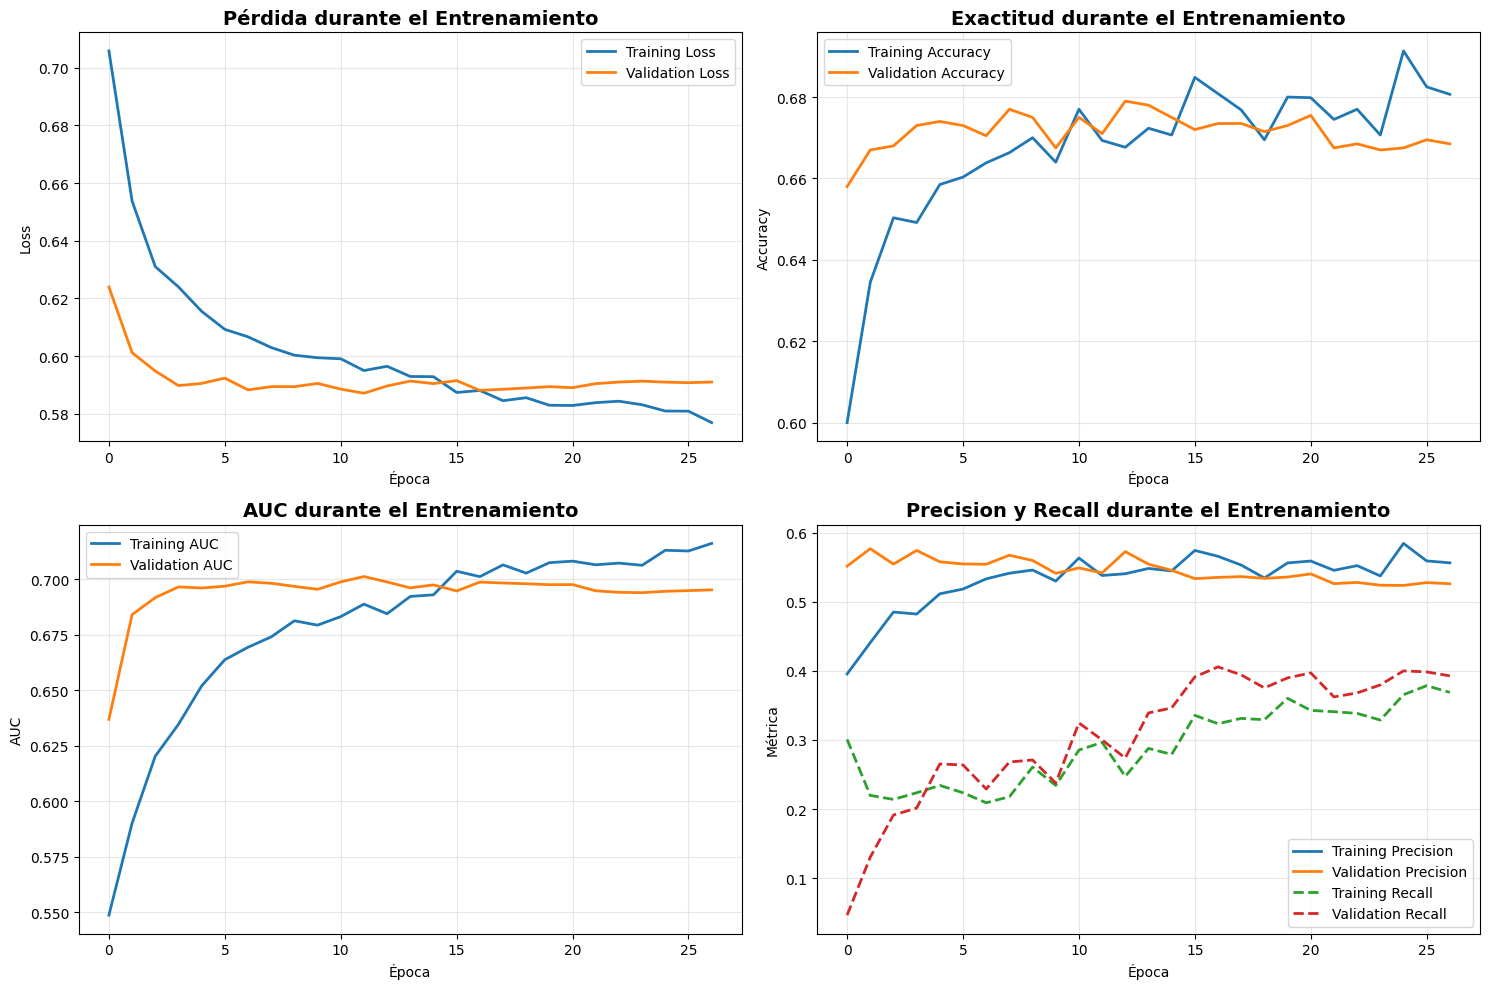

In [17]:
# VISUALIZACIÓN DEL ENTRENAMIENTO

def plot_training_history(history):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Loss
    axes[0, 0].plot(history.history['loss'], label='Training Loss', linewidth=2)
    axes[0, 0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    axes[0, 0].set_title('Pérdida durante el Entrenamiento', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Época')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Accuracy
    axes[0, 1].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
    axes[0, 1].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    axes[0, 1].set_title('Exactitud durante el Entrenamiento', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Época')
    axes[0, 1].set_ylabel('Accuracy')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # AUC
    axes[1, 0].plot(history.history['auc'], label='Training AUC', linewidth=2)
    axes[1, 0].plot(history.history['val_auc'], label='Validation AUC', linewidth=2)
    axes[1, 0].set_title('AUC durante el Entrenamiento', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Época')
    axes[1, 0].set_ylabel('AUC')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # Precision y Recall
    axes[1, 1].plot(history.history['precision'], label='Training Precision', linewidth=2)
    axes[1, 1].plot(history.history['val_precision'], label='Validation Precision', linewidth=2)
    axes[1, 1].plot(history.history['recall'], label='Training Recall', linewidth=2, linestyle='--')
    axes[1, 1].plot(history.history['val_recall'], label='Validation Recall', linewidth=2, linestyle='--')
    axes[1, 1].set_title('Precision y Recall durante el Entrenamiento', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Época')
    axes[1, 1].set_ylabel('Métrica')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_training_history(history)

In [18]:
# EVALUACIÓN EN CONJUNTO DE VALIDACIÓN
y_val_pred_proba = model.predict(X_val_scaled)
y_val_pred = (y_val_pred_proba > 0.5).astype(int).flatten()

# métricas de validación
accuracy_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)
roc_auc_val = roc_auc_score(y_val, y_val_pred_proba)

print(f"Accuracy:  {accuracy_val:.4f} ({accuracy_val*100:.2f}%)")
print(f"Precision: {precision_val:.4f}")
print(f"Recall:    {recall_val:.4f}")
print(f"F1-Score:  {f1_val:.4f}")
print(f"AUC-ROC:   {roc_auc_val:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Accuracy:  0.6710 (67.10%)
Precision: 0.5419
Recall:    0.3000
F1-Score:  0.3862
AUC-ROC:   0.7012


In [19]:
# EVALUACIÓN EN TEST

y_test_pred_proba = model.predict(X_test_scaled)
y_test_pred = (y_test_pred_proba > 0.5).astype(int).flatten()

print("Predicciones realizadas en el conjunto de prueba.")
print(f"Forma de y_pred_proba: {y_test_pred_proba.shape}")
print(f"Forma de y_pred: {y_test_pred.shape}")

# Calcular métricas de evaluación en TEST
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)

print("\n" + "="*70)
print("MÉTRICAS DE RENDIMIENTO - CONJUNTO DE PRUEBA (TEST)")
print("="*70)
print(f"Accuracy:  {accuracy_test:.4f} ({accuracy_test*100:.2f}%)")
print(f"Precision: {precision_test:.4f}")
print(f"Recall:    {recall_test:.4f}")
print(f"F1-Score:  {f1_test:.4f}")
print(f"AUC-ROC:   {roc_auc_test:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Predicciones realizadas en el conjunto de prueba.
Forma de y_pred_proba: (2000, 1)
Forma de y_pred: (2000,)

MÉTRICAS DE RENDIMIENTO - CONJUNTO DE PRUEBA (TEST)
Accuracy:  0.6600 (66.00%)
Precision: 0.5141
Recall:    0.2638
F1-Score:  0.3487
AUC-ROC:   0.6575


In [20]:
# COMPARACIÓN: VALIDACIÓN vs TEST

print("\n" + "="*70)
print("COMPARACIÓN: VALIDACIÓN vs TEST")
print("="*70)
comparison_val_test = pd.DataFrame({
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC'],
    'Validación': [accuracy_val, precision_val, recall_val, f1_val, roc_auc_val],
    'Test': [accuracy_test, precision_test, recall_test, f1_test, roc_auc_test]
})
comparison_val_test['Diferencia'] = comparison_val_test['Test'] - comparison_val_test['Validación']
print(comparison_val_test.to_string(index=False))


COMPARACIÓN: VALIDACIÓN vs TEST
  Métrica  Validación     Test  Diferencia
 Accuracy    0.671000 0.660000   -0.011000
Precision    0.541885 0.514124   -0.027761
   Recall    0.300000 0.263768   -0.036232
 F1-Score    0.386194 0.348659   -0.037535
  AUC-ROC    0.701164 0.657471   -0.043693


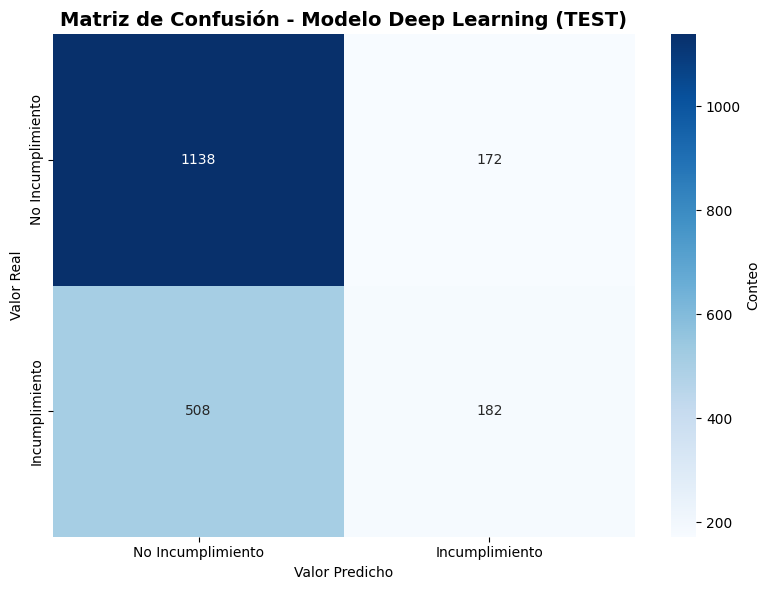

In [21]:
# MATRIZ DE CONFUSIÓN 

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Incumplimiento', 'Incumplimiento'],
            yticklabels=['No Incumplimiento', 'Incumplimiento'],
            cbar_kws={'label': 'Conteo'})
plt.title('Matriz de Confusión - Modelo Deep Learning (TEST)', fontsize=14, fontweight='bold')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.tight_layout()
plt.show()

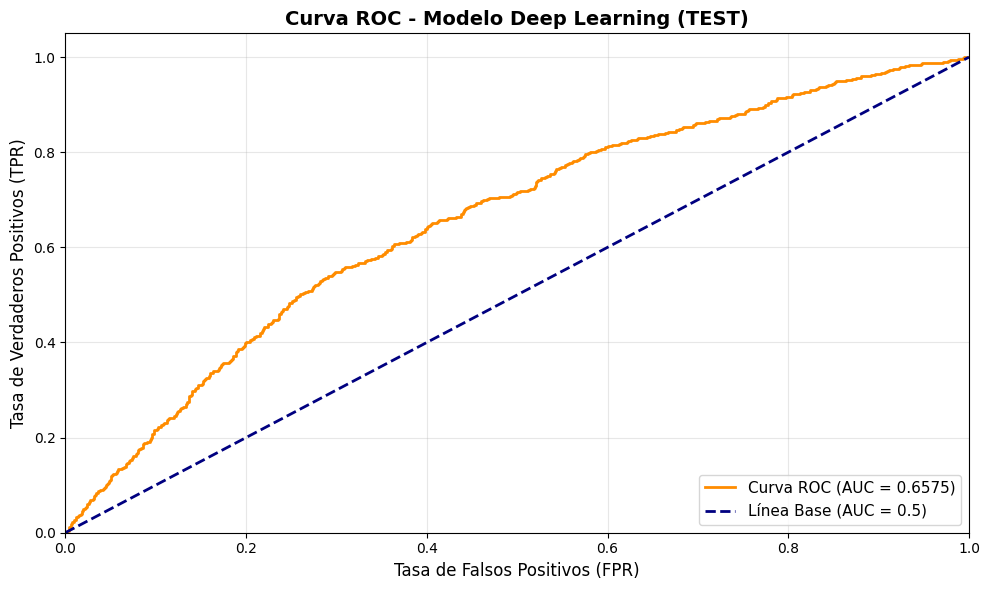

In [22]:
# CURVA ROC 

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'Curva ROC (AUC = {roc_auc_test:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Línea Base (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=12)
plt.title('Curva ROC - Modelo Deep Learning (TEST)', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()